<a href="https://colab.research.google.com/github/4zmyyy/Belajar-Python-/blob/main/Python%20learning%20day%2021%3A%20data%20analysis%20and%20politics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

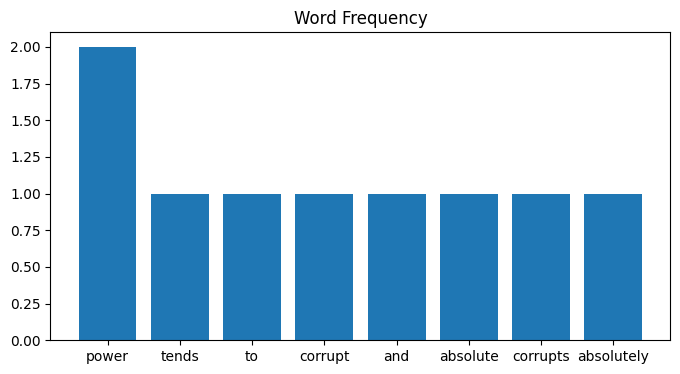

Top Words:
       word  count
0    power      2
1    tends      1
2       to      1
3  corrupt      1
4      and      1 

Top Bigrams:
             bigram  count
0   (power, tends)      1
1      (tends, to)      1
2    (to, corrupt)      1
3   (corrupt, and)      1
4  (and, absolute)      1 



In [2]:
import re
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt

# analysis
text = """
Power tends to corrupt, and absolute power corrupts absolutely.
"""

# text = token
tokens = re.findall(r'\b\w+\b', text.lower())

# word frequency
word_freq = Counter(tokens)
df_freq = pd.DataFrame(word_freq.most_common(), columns=["word", "count"])

# --- bigram pattern reconigtion ---
bigrams = list(zip(tokens, tokens[1:]))
bigram_freq = Counter(bigrams)
df_bi = pd.DataFrame(bigram_freq.most_common(10), columns=["bigram", "count"])

# --- 5. Visualization ---
plt.figure(figsize=(8,4))
plt.bar(df_freq["word"], df_freq["count"])
plt.title("Word Frequency")
plt.show()

# --- 6. Cetak hasil ---
print("Top Words:\n", df_freq.head(), "\n")
print("Top Bigrams:\n", df_bi.head(), "\n")



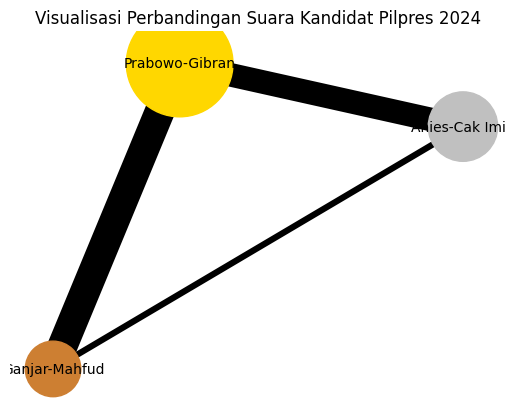

In [3]:
import networkx as nx
import matplotlib.pyplot as plt

# Data hasil Pilpres 2024
votes = {
    "Prabowo-Gibran": 59,
    "Anies-Cak Imin": 25,
    "Ganjar-Mahfud": 16
}

# Inisiasi graf
G = nx.Graph()

# Tambahkan node dengan ukuran berkorelasi dengan suara
for candidate, pct in votes.items():
    G.add_node(candidate, size=pct*100)  # dikali 100 untuk kejelasan visual

# Tambah edges untuk menggambarkan gap (simple, bisa dikembangkan)
G.add_edge("Prabowo-Gibran", "Anies-Cak Imin", weight=votes["Prabowo-Gibran"] - votes["Anies-Cak Imin"])
G.add_edge("Prabowo-Gibran", "Ganjar-Mahfud", weight=votes["Prabowo-Gibran"] - votes["Ganjar-Mahfud"])
G.add_edge("Anies-Cak Imin", "Ganjar-Mahfud", weight=votes["Anies-Cak Imin"] - votes["Ganjar-Mahfud"])

# Posisi node otomatis
pos = nx.spring_layout(G, seed=42)

# Gambar nodes
sizes = [G.nodes[n]["size"] for n in G.nodes]
nx.draw_networkx_nodes(G, pos, node_size=sizes, node_color=["#FFD700", "#C0C0C0", "#CD7F32"])

# Gambar edges dengan ketebalan berdasarkan weight
weights = [G[u][v]['weight'] for u, v in G.edges()]
nx.draw_networkx_edges(G, pos, width=[w/2 for w in weights])

# Label
nx.draw_networkx_labels(G, pos, font_size=10)

plt.title("Visualisasi Perbandingan Suara Kandidat Pilpres 2024")
plt.axis('off')
plt.show()


In [4]:
import torch
import torch.nn as nn
import numpy as np

# Data dummy: simulasi masuknya suara (misal dalam % bertahap)
# Bisa diganti data real per update KPU
prabowo = [40, 50, 55, 58, 59]
anies = [35, 30, 27, 26, 25]
ganjar = [25, 20, 18, 16, 16]

data = np.array([prabowo, anies, ganjar], dtype=np.float32).T
X = torch.tensor(data[:-1].reshape(-1, 1, 3))
y = torch.tensor(data[1:].reshape(-1, 3))

# RNN Model
class VoteRNN(nn.Module):
    def __init__(self, input_size=3, hidden_size=8, output_size=3):
        super().__init__()
        self.rnn = nn.RNN(input_size, hidden_size, batch_first=True)
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        out, _ = self.rnn(x)
        out = self.fc(out[:, -1, :])
        return out

model = VoteRNN()
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

# Training loop
for epoch in range(200):
    optimizer.zero_grad()
    output = model(X)
    loss = criterion(output, y)
    loss.backward()
    optimizer.step()

# Prediksi 1 langkah ke depan
with torch.no_grad():
    pred = model(X[-1].unsqueeze(0))
    print("Prediksi distribusi suara berikutnya:", pred.numpy().round(2))


Prediksi distribusi suara berikutnya: [[16.76 15.03 13.88]]


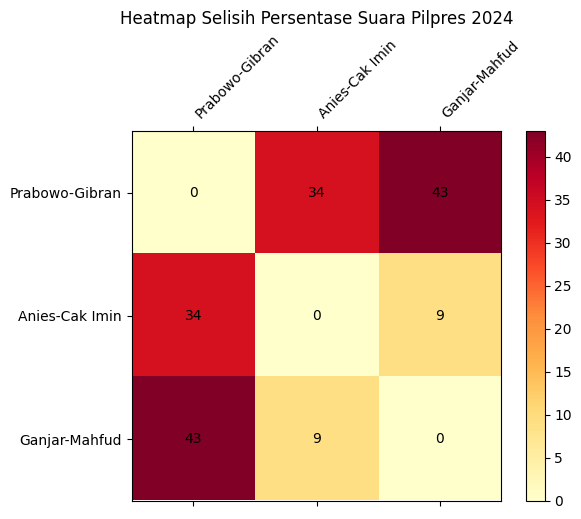

In [5]:
import matplotlib.pyplot as plt
import numpy as np

# Data suara
candidates = ["Prabowo-Gibran", "Anies-Cak Imin", "Ganjar-Mahfud"]
votes = [59, 25, 16]

# Buat matriks gap
n = len(candidates)
gap_matrix = np.zeros((n, n))

for i in range(n):
    for j in range(n):
        gap_matrix[i, j] = abs(votes[i] - votes[j])

# Plot heatmap manual (tanpa seaborn)
fig, ax = plt.subplots()
cax = ax.matshow(gap_matrix, cmap="YlOrRd")

plt.xticks(range(n), candidates, rotation=45, ha="left")
plt.yticks(range(n), candidates)

# Label tiap cell
for i in range(n):
    for j in range(n):
        ax.text(j, i, int(gap_matrix[i, j]), va='center', ha='center')

plt.colorbar(cax)
plt.title("Heatmap Selisih Persentase Suara Pilpres 2024")
plt.show()


In [6]:
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import numpy as np

# Data simulasi perkembangan suara (persentase)
time_steps = ["10%", "30%", "50%", "70%", "100%"]
prabowo = [40, 50, 55, 58, 59]
anies   = [35, 30, 27, 26, 25]
ganjar  = [25, 20, 18, 16, 16]

# Setup figure
fig, ax = plt.subplots(figsize=(6,4))
ax.set_ylim(0, 65)
ax.set_xlim(0, len(time_steps)-1)
ax.set_xticks(range(len(time_steps)))
ax.set_xticklabels(time_steps)
ax.set_ylabel("Persentase Suara (%)")
ax.set_title("Animasi Perkembangan Suara Pilpres 2024")

line1, = ax.plot([], [], marker='o', color="#1E90FF", lw=2, label="Prabowo-Gibran")
line2, = ax.plot([], [], marker='o', color="#FF4500", lw=2, label="Anies-Cak Imin")
line3, = ax.plot([], [], marker='o', color="#32CD32", lw=2, label="Ganjar-Mahfud")
ax.legend()

# Init function
def init():
    line1.set_data([], [])
    line2.set_data([], [])
    line3.set_data([], [])
    return line1, line2, line3

# Update function
def update(frame):
    x = np.arange(frame+1)
    line1.set_data(x, prabowo[:frame+1])
    line2.set_data(x, anies[:frame+1])
    line3.set_data(x, ganjar[:frame+1])
    return line1, line2, line3

# Animasi
ani = animation.FuncAnimation(fig, update, frames=len(time_steps),
                              init_func=init, blit=True, interval=1000, repeat=False)

# Simpan ke GIF
ani.save("pilpres2024.gif", writer="pillow")
plt.close()

print("Animasi GIF tersimpan sebagai pilpres2024.gif")


Animasi GIF tersimpan sebagai pilpres2024.gif
